In [1]:
import random as rnd
import pandas as pd
import numpy as np
from math import floor, log, exp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from math import factorial
from scipy.stats import chi2

# 1. Алгоритмы моделирования дискретных случайных чисел с заданным законом распределения
## 2.1. Равномерное распределение (дискретное)

irnuni  Теор. знач  Погрешность
@M@   50.27810       50.50     -0.22190
@D@  845.56196      833.25     12.31196

<Axes: ylabel='Probability'>

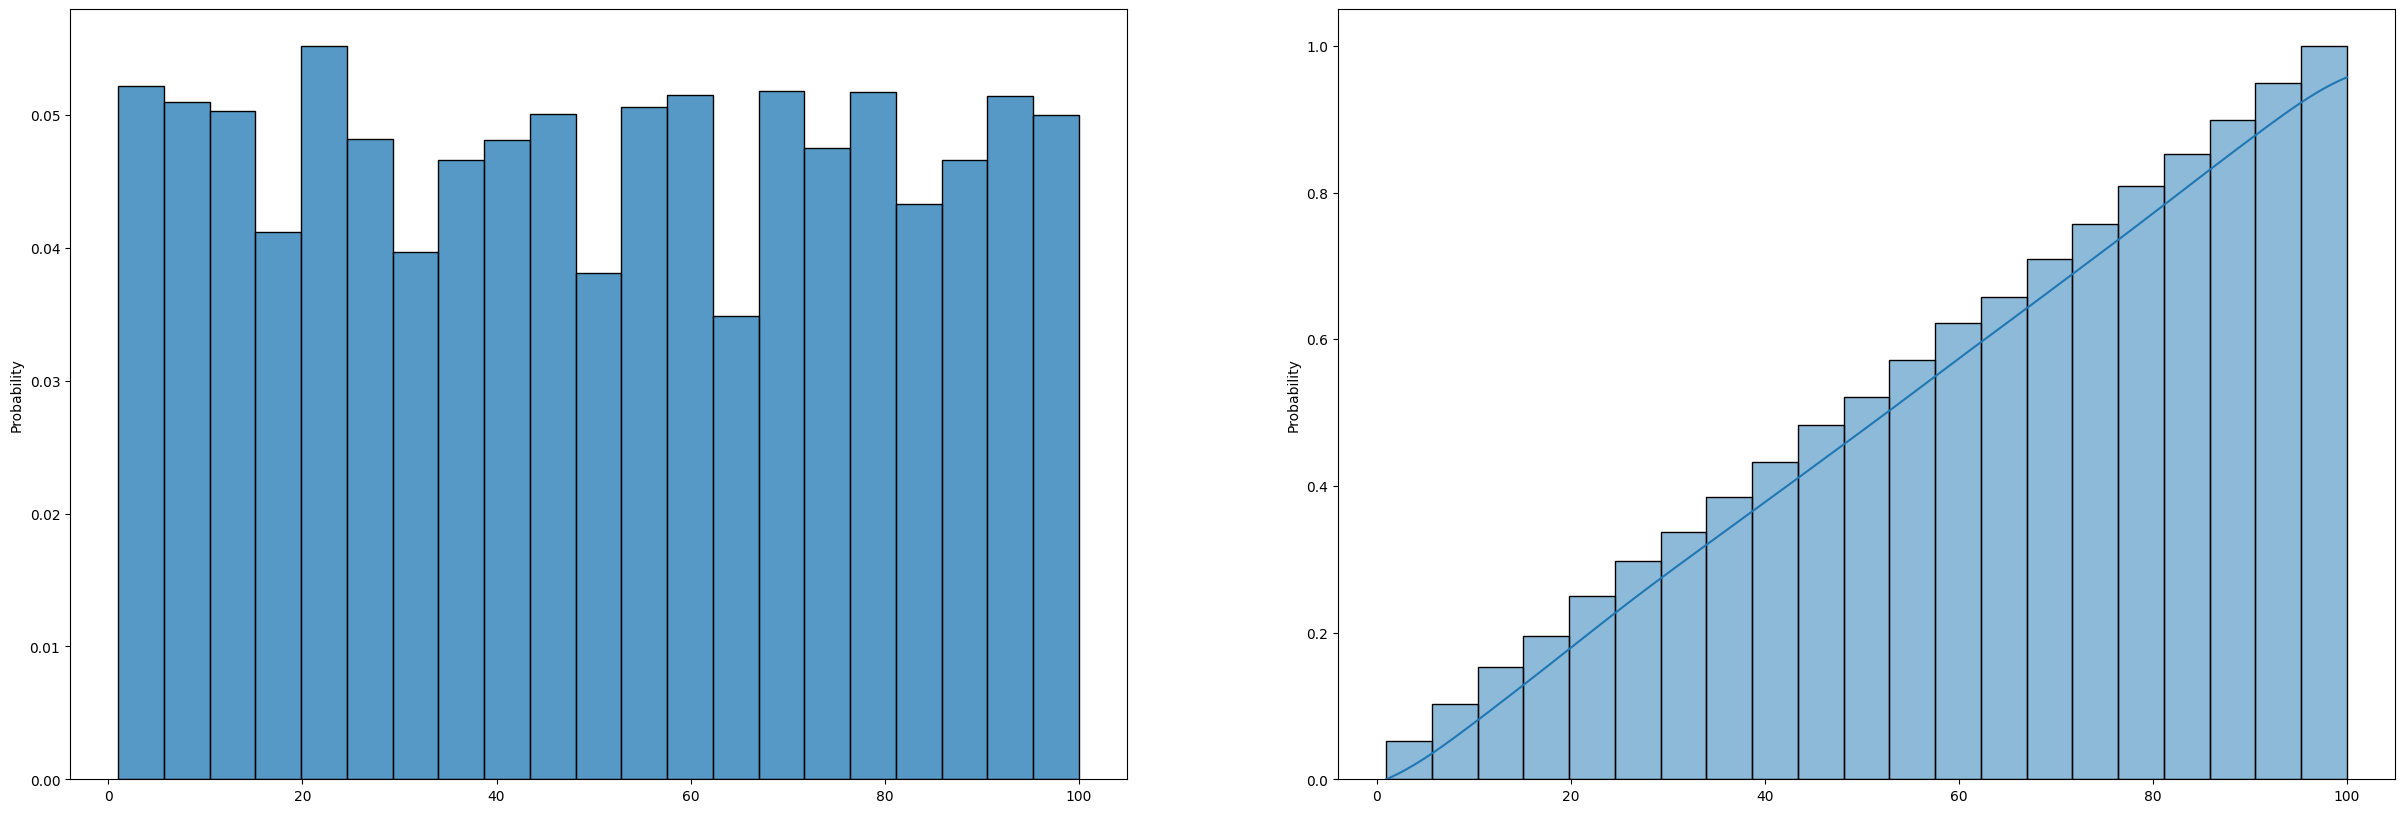

In [2]:
def irnuni(ilow, iup):
    return floor((iup - ilow + 1) * rnd.random() + ilow)
ilow = 1
iup = 100
uniseries = np.array([irnuni(ilow, iup) for _ in range(10000)])
df = pd.DataFrame(index=['@M@', '@D@'])
df['irnuni'] = [uniseries.mean(), uniseries.var()]
df['Теор. знач'] = [(ilow + iup) / 2, ((iup - ilow + 1) ** 2 - 1) / 12]
df['Погрешность'] = df['irnuni'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(uniseries, ax=ax[0], stat="probability")
sns.histplot(uniseries, ax=ax[1], kde=True, stat="probability", cumulative=True)

## 2.2 Биномиальное распределение

irnbin  Теор. знач  Погрешность
@M@  5.003600         5.0     0.003600
@D@  2.494987         2.5    -0.005013

<Axes: ylabel='Probability'>

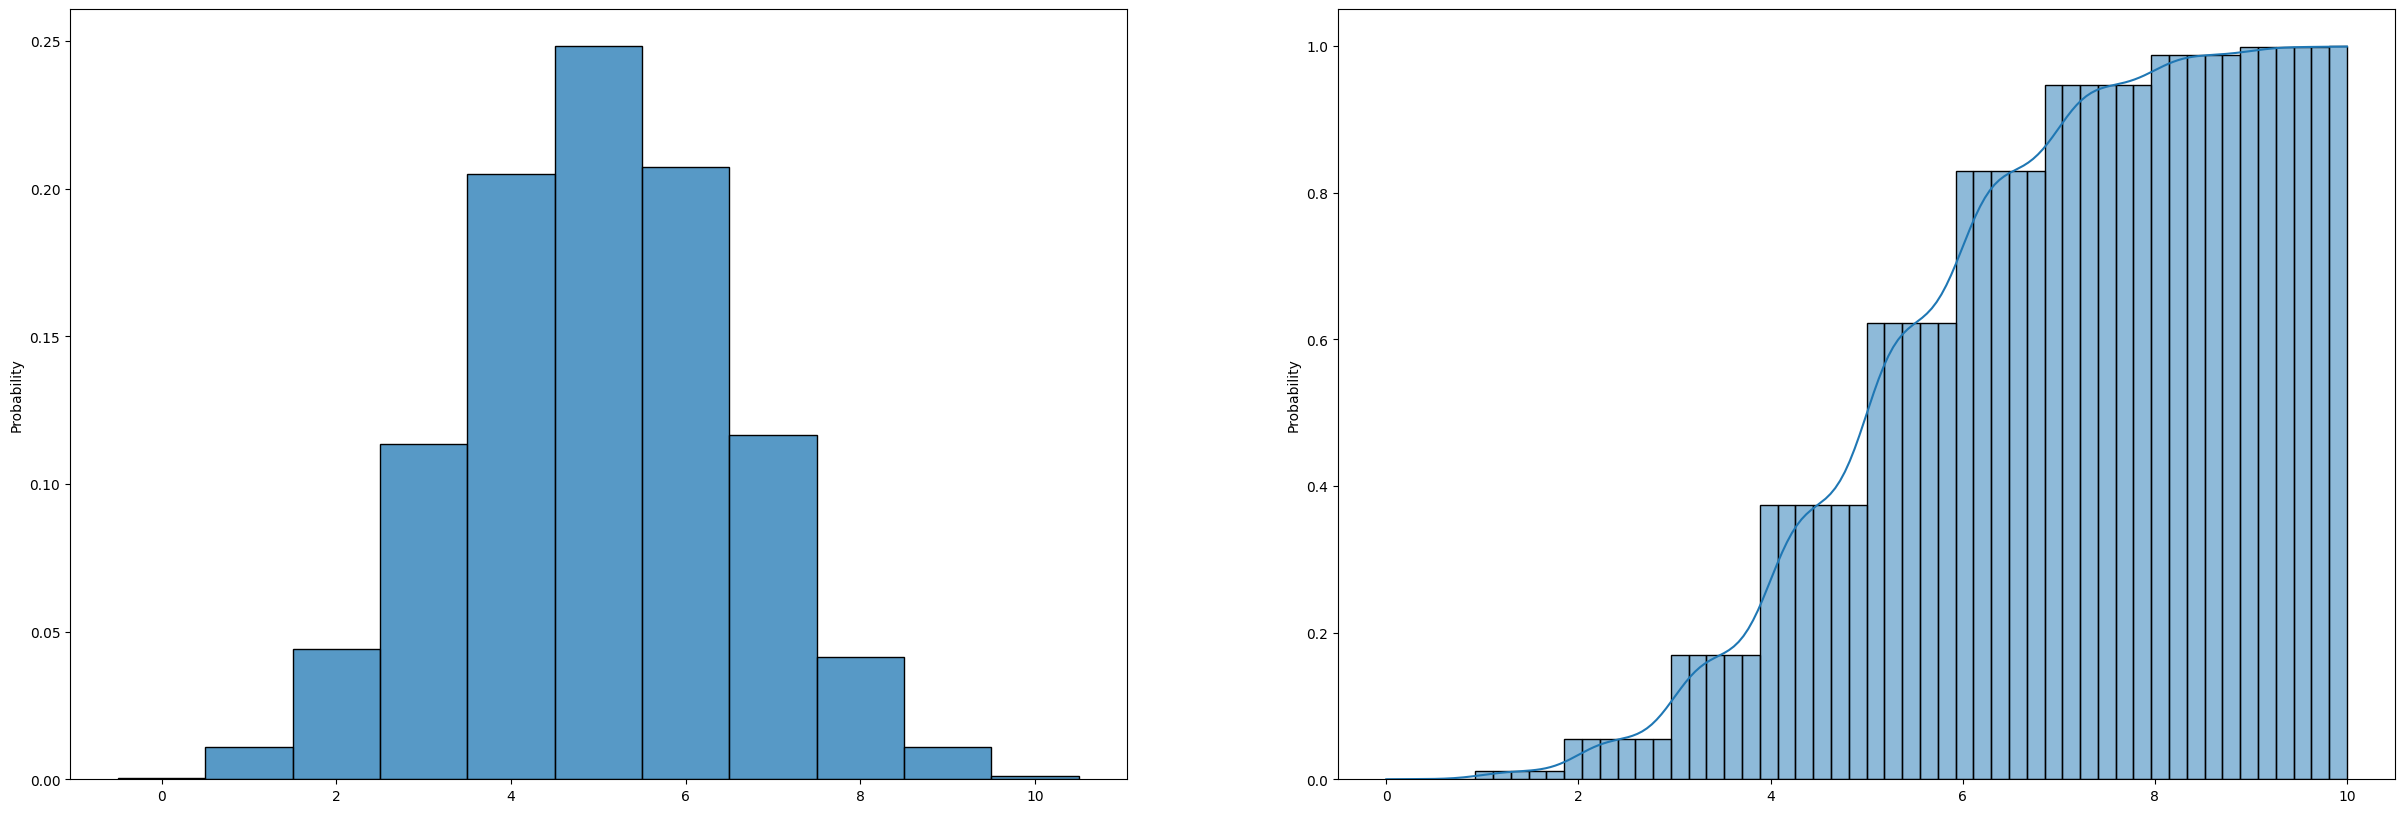

In [3]:
def irnbin(p, N):
    if N < 100:
        a = rnd.random()
        p_r = (1 - p) ** N
        m = 0
        while a - p_r >= 0:
            a -= p_r
            p_r *= (p * (N - m)) / ((m + 1) * (1 - p))
            m += 1
        return m
    else:
        return round(rnd.gauss(N * p, (N * p * (1 - p)) ** 0.5) + 0.5)
N = 10
p = 0.5
binseries = np.array([irnbin(p, N) for _ in range(10000)])
df = pd.DataFrame(index=['@M@', '@D@'])
df['irnbin'] = [binseries.mean(), binseries.var()]
df['Теор. знач'] = [N * p, N * p * (1 - p)]
df['Погрешность'] = df['irnbin'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.histplot(binseries, ax=ax[0], stat="probability", discrete=True)
sns.histplot(binseries, ax=ax[1], kde=True, stat="probability", cumulative=True)

## 2.3 Геометрическое распределение

irngeo  Теор. знач  Погрешность
alg1 @M@  1.995100         2.0    -0.004900
     @D@  1.986676         2.0    -0.013324
alg2 @M@  1.984300         2.0    -0.015700
     @D@  2.035454         2.0     0.035454
alg3 @M@  1.999300         2.0    -0.000700
     @D@  1.970300         2.0    -0.029700

<Axes: ylabel='Probability'>

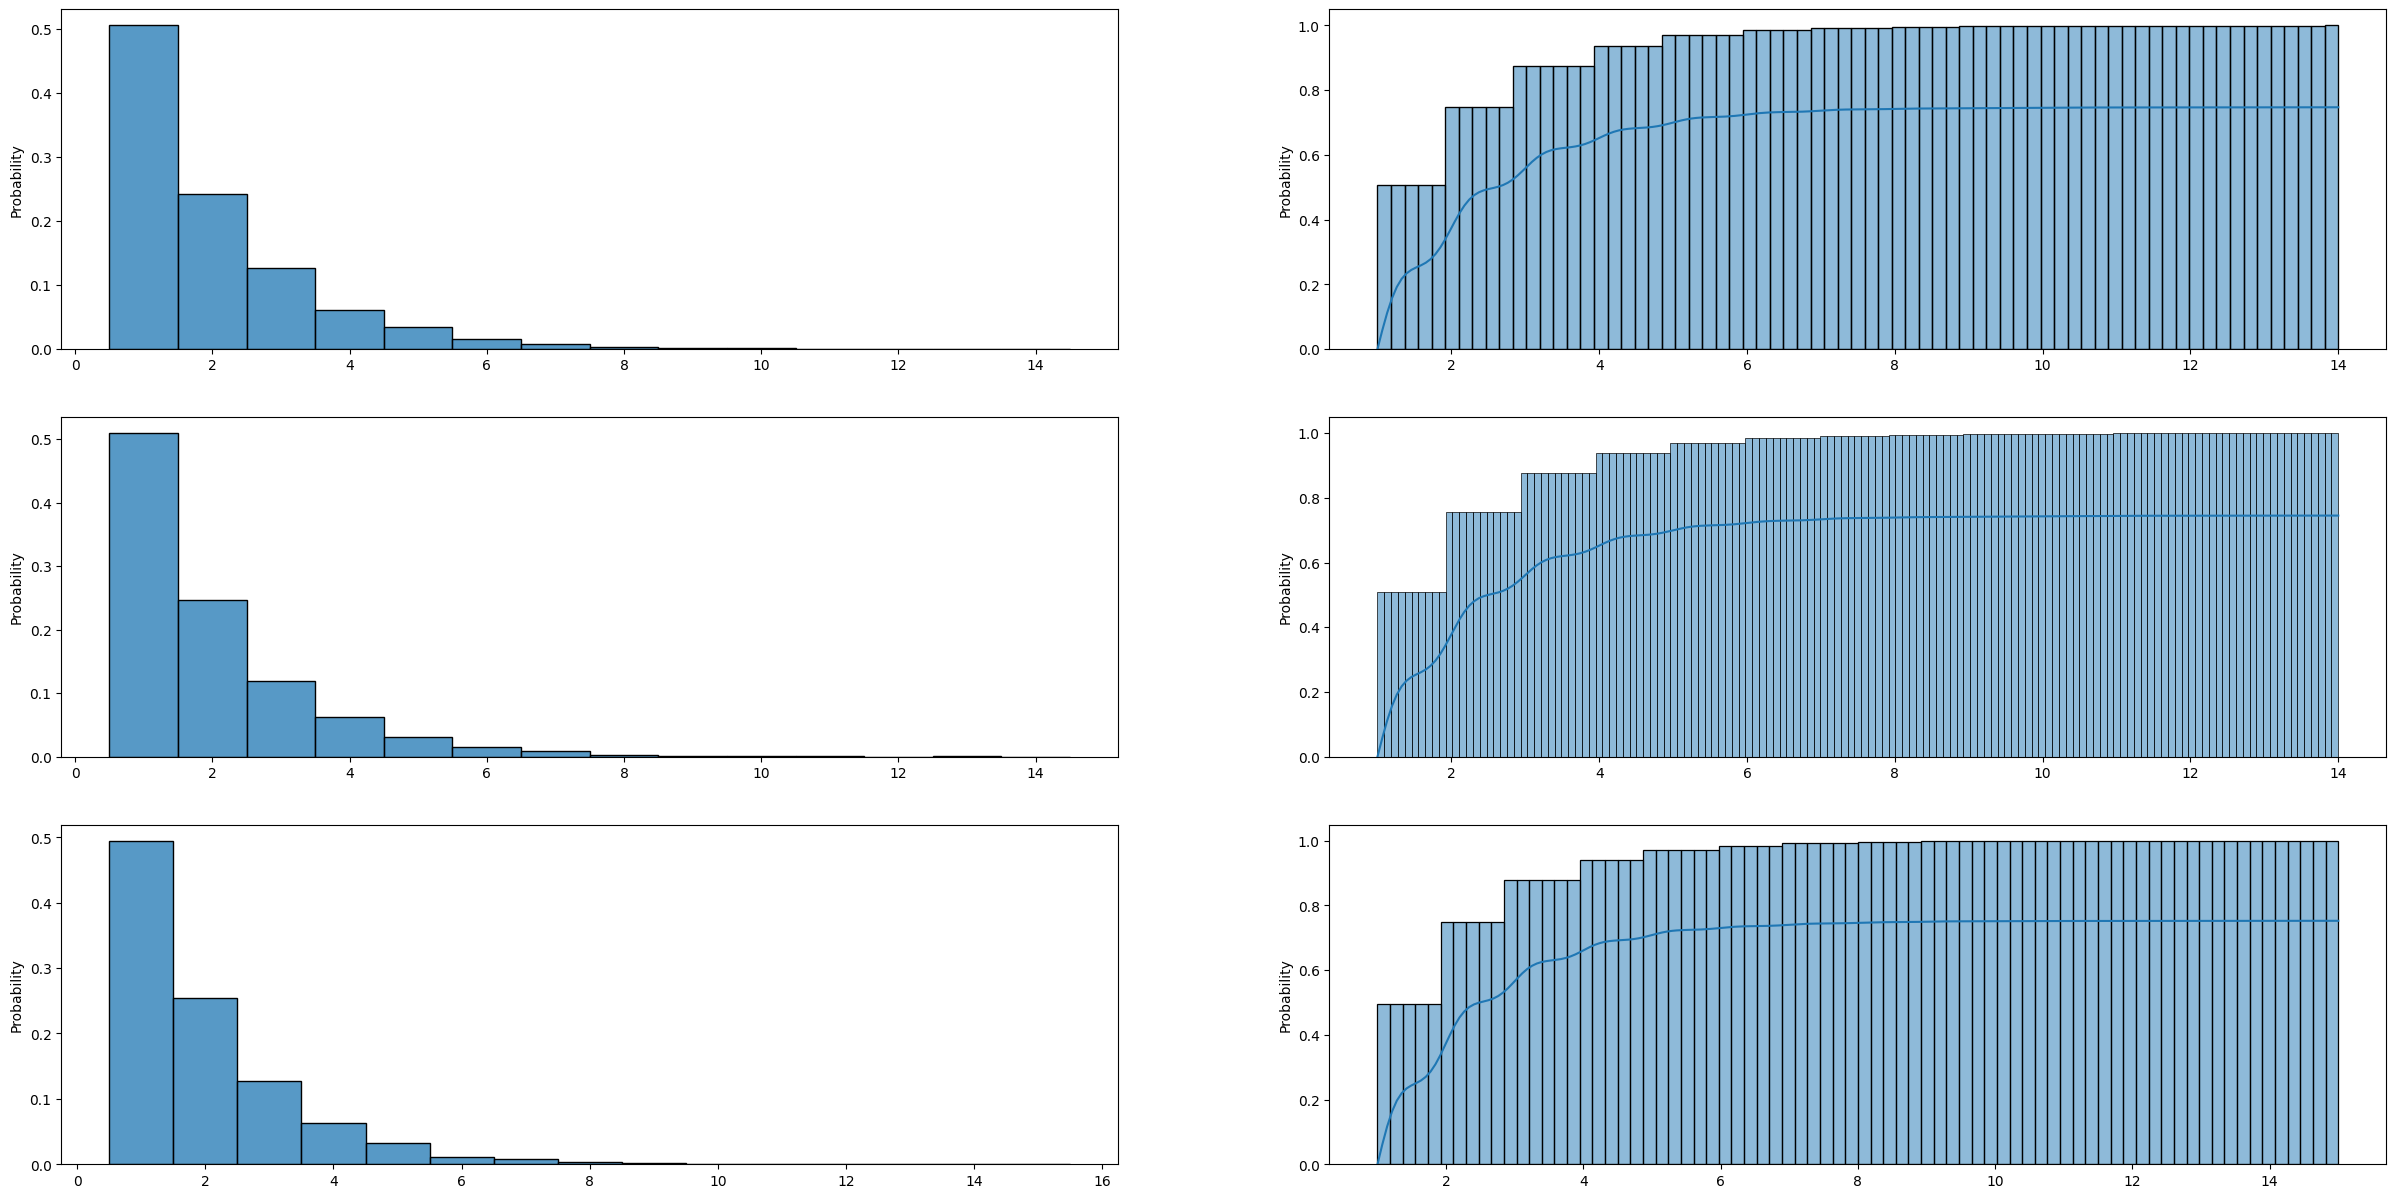

In [21]:
def irngeo_1(p):
    a = rnd.random()
    p_r = p
    m = 1
    while a - p_r > 0:
        a -= p_r
        p_r *= (1 - p)
        m += 1
    return m

def irngeo_2(p):
    a = rnd.random()
    m = 1
    while a >= p:
        a = rnd.random()
        m += 1
    return m

def irngeo_3(p):
    a = rnd.random()
    m = int(log(a) / log(1 - p)) + 1
    return m
p = 0.5
geomseries1 = np.array([irngeo_1(p) for _ in range(10000)])
geomseries2 = np.array([irngeo_2(p) for _ in range(10000)])
geomseries3 = np.array([irngeo_3(p) for _ in range(10000)])
df = pd.DataFrame(index=pd.MultiIndex.from_product([['alg1', 'alg2', 'alg3'], ['@M@', '@D@']]))
df['irngeo'] = [geomseries1.mean(), geomseries1.var(), geomseries2.mean(), geomseries2.var(), geomseries3.mean(), geomseries3.var(),]
df['Теор. знач'] = [1 / p, (1 - p) / (p ** 2)] * 3
df['Погрешность'] = df['irngeo'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(3, 2, figsize=(30, 15))
sns.histplot(geomseries1, ax=ax[0][0], stat="probability", discrete=True)
sns.histplot(geomseries1, ax=ax[0][1], kde=True, stat="probability", cumulative=True)
sns.histplot(geomseries2, ax=ax[1][0], stat="probability", discrete=True)
sns.histplot(geomseries2, ax=ax[1][1], kde=True, stat="probability", cumulative=True)
sns.histplot(geomseries3, ax=ax[2][0], stat="probability", discrete=True)
sns.histplot(geomseries3, ax=ax[2][1], kde=True, stat="probability", cumulative=True)

## 2.4 Распределение пуассона

irnp  Теор. знач  Погрешность
irnpoi @M@  10.018600          10     0.018600
       @D@  10.120854          10     0.120854
irnpsn @M@   9.987300          10    -0.012700
       @D@  10.020939          10     0.020939

<Axes: ylabel='Probability'>

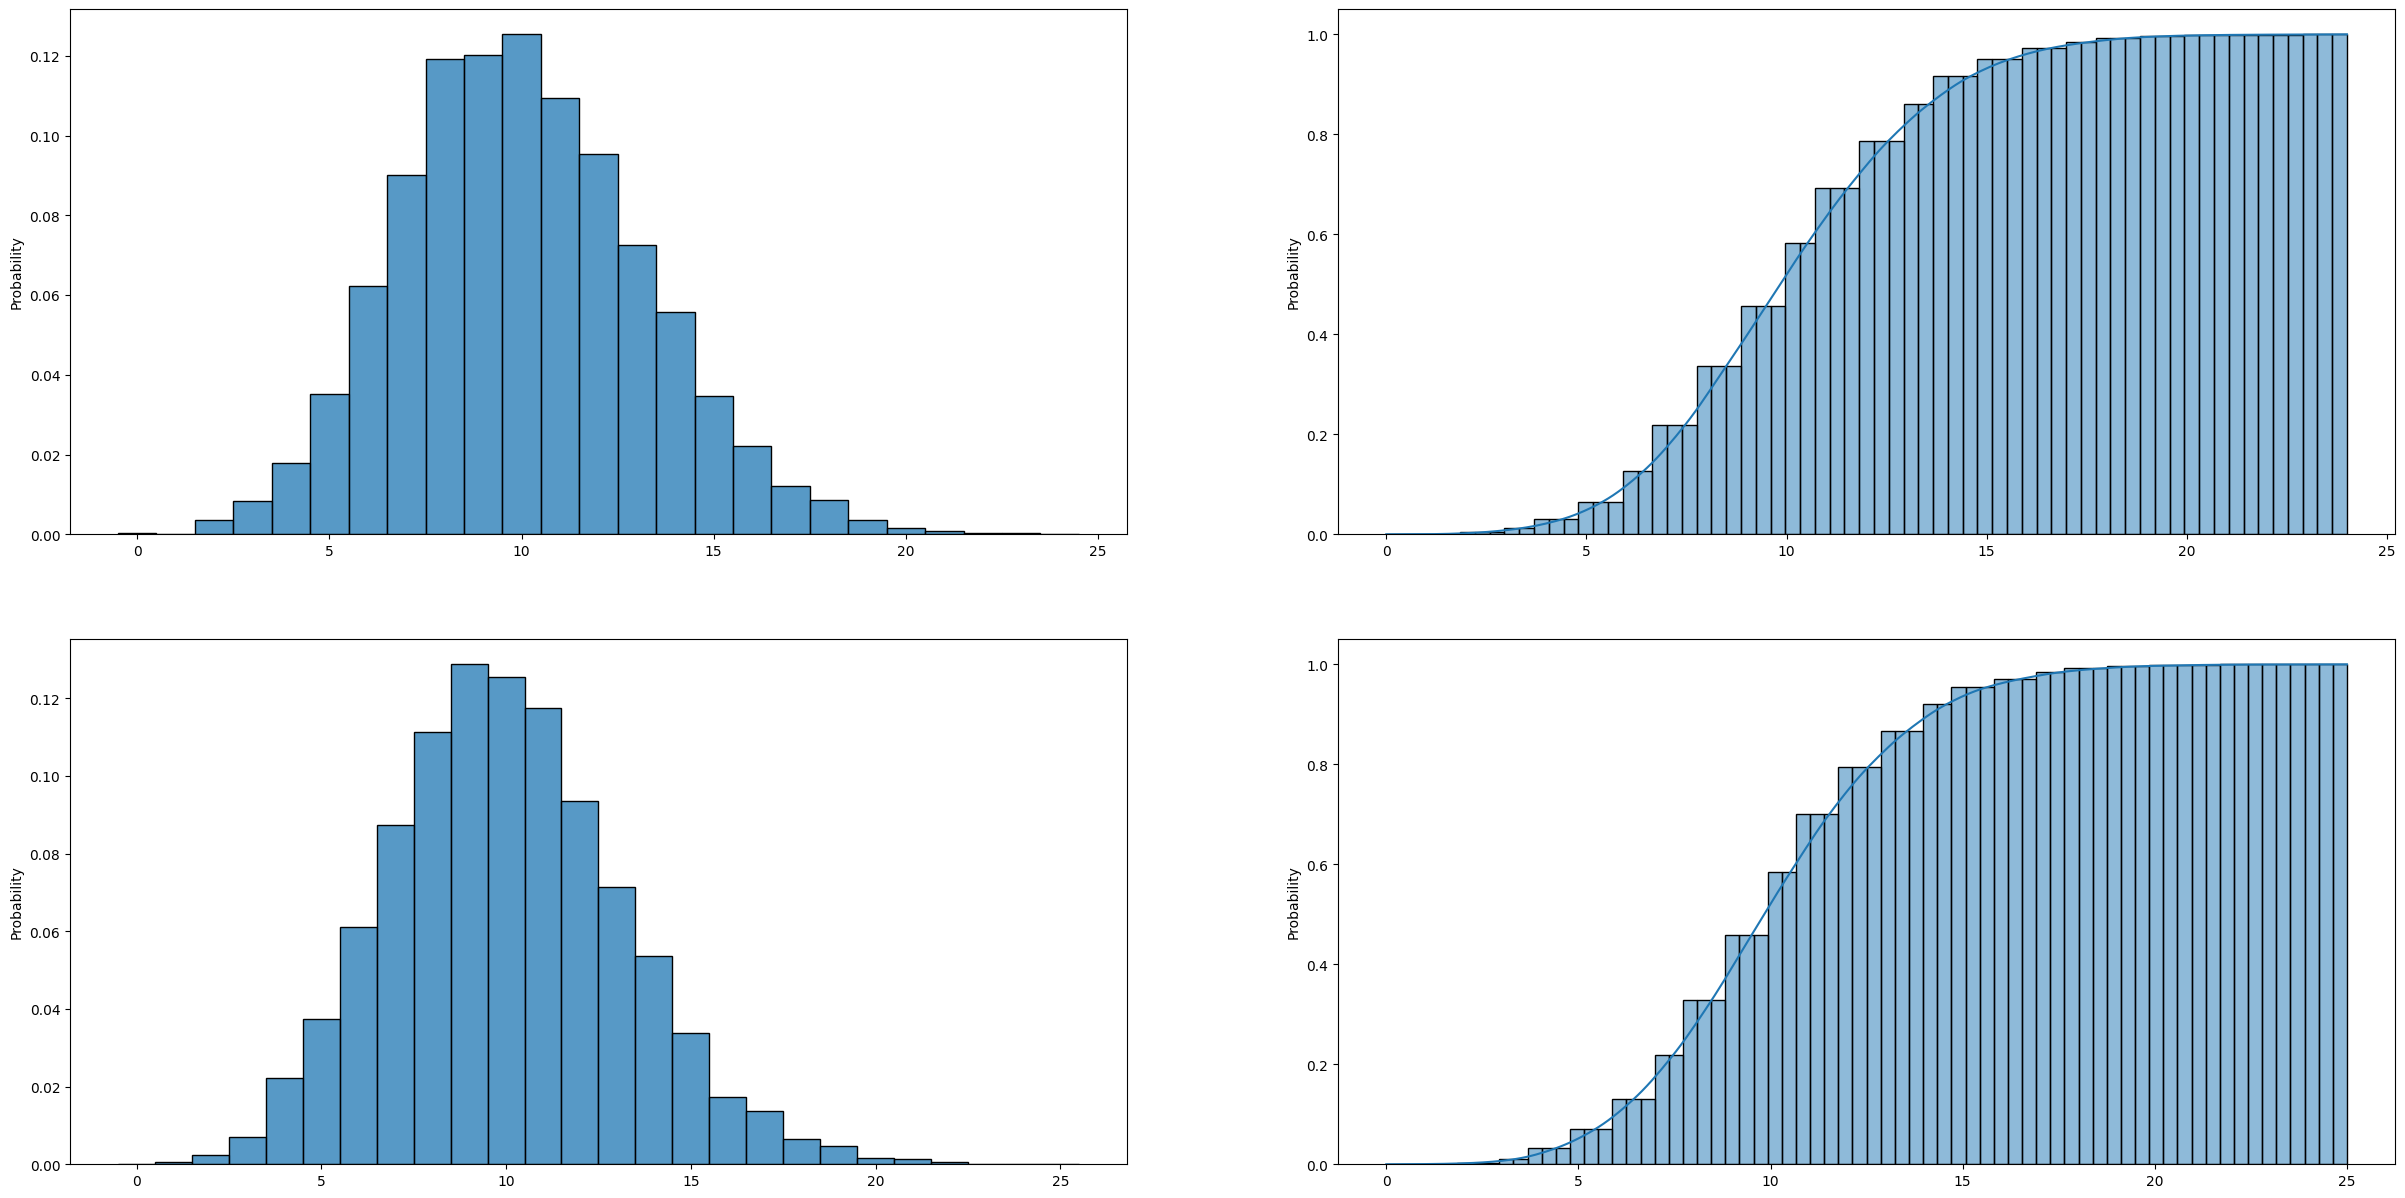

In [36]:
def irnpoi(mu):
    a = rnd.random()
    p_r = exp(-mu)
    m = 1
    while a > p_r:
        a -= p_r
        p_r *= (mu / m)
        m += 1
    return m - 1

def irnpsn(mu):
    p_r = rnd.random()
    m = 1
    while p_r > exp(-mu):
        p_r *= rnd.random()
        m += 1
    return m - 1
mu = 10
puassseries1 = np.array([irnpoi(mu) for _ in range(10000)])
puassseries2 = np.array([irnpsn(mu) for _ in range(10000)])
df = pd.DataFrame(index=pd.MultiIndex.from_product([['irnpoi', 'irnpsn'], ['@M@', '@D@']]))
df['irnp'] = [puassseries1.mean(), puassseries1.var(), puassseries2.mean(), puassseries2.var()]
df['Теор. знач'] = [mu] * 4
df['Погрешность'] = df['irnp'] - df['Теор. знач']
display(df)
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.histplot(puassseries1, ax=ax[0][0], stat="probability", discrete=True)
sns.histplot(puassseries1, ax=ax[0][1], kde=True, stat="probability", cumulative=True)
sns.histplot(puassseries2, ax=ax[1][0], stat="probability", discrete=True)
sns.histplot(puassseries2, ax=ax[1][1], kde=True, stat="probability", cumulative=True)

# Проверка на монотонность д. Кнутта

In [6]:
def find_decreasing_sequences(arr):
    lengths = []
    i = 0
    while i < len(arr):
        curr_length = 1
        for j in range(i+1, len(arr)):
            if arr[j] <= arr[j-1]:
                curr_length += 1
            else:
                break
        i += curr_length + 1
        lengths.append(curr_length)
    return lengths

def find_increasing_sequences(arr):
    lengths = []
    i = 0
    while i < len(arr):
        curr_length = 1
        for j in range(i+1, len(arr)):
            if arr[j] >= arr[j-1]:
                curr_length += 1
            else:
                break
        i += curr_length + 1
        lengths.append(curr_length)
    return lengths

In [7]:
arr = [3, 5, 4, 2, 1, 4, 6, 1, 0]
descending = find_decreasing_sequences(arr)
increasing = find_increasing_sequences(arr)
print(descending) # [5, 3, 2]
print(increasing) # [1, 1, 2, 2]

[1, 3, 3]
[2, 1, 2, 1]


In [8]:
descending_v = dict(Counter(descending))
increasing_v = dict(Counter(increasing))
max_descending_v = max(descending_v.keys())
max_increasing_v = max(increasing_v.keys())
for key in range(1, max_descending_v):
    if key not in descending_v:
        descending_v[key] = 0
for key in range(1, max_increasing_v):
    if key not in increasing_v:
        increasing_v[key] = 0
print(descending_v)
print(increasing_v)

{1: 1, 3: 2, 2: 0}
{2: 2, 1: 2}


In [9]:
def find_p(i):
    return 1 / factorial(i) - 1 / factorial(i + 1)

In [10]:
descending_p = dict(sorted({i: find_p(i) for i in descending_v.keys()}.items()))
increasing_p = dict(sorted({i: find_p(i) for i in increasing_v.keys()}.items()))
print(descending_p)
print(increasing_p)

{1: 0.5, 2: 0.33333333333333337, 3: 0.125}
{1: 0.5, 2: 0.33333333333333337}


In [11]:
def find_chi_squares(arr):
    descending = find_decreasing_sequences(arr)
    descending_v = dict(Counter(descending))
    max_descending_v = max(descending_v.keys())
    for key in range(1, max_descending_v):
        if key not in descending_v:
            descending_v[key] = 0
    descending_v = dict(sorted(descending_v.items()))
    sum_descending_v = sum(descending_v.values())
    descending_p = dict(sorted({i: find_p(i) for i in descending_v.keys()}.items()))
    print(f'descending: \nv: {descending_v}, \nsum_v: {sum_descending_v}, \np: {descending_p}')
    desc_chi_square = sum([((v - sum_descending_v * p) ** 2 / (sum_descending_v * p)) for v, p in zip(descending_v.values(), descending_p.values())])
    print(f'desc_chi_square: {desc_chi_square}')
    print(f't = {max_descending_v}')
    print(f'p_chi_square_t = {1 - chi2.cdf(desc_chi_square, max_descending_v - 1)}\n')
    
    increasing = find_increasing_sequences(arr)
    increasing_v = dict(Counter(increasing))
    max_increasing_v = max(increasing_v.keys())
    for key in range(1, max_increasing_v):
        if key not in increasing_v:
            increasing_v[key] = 0
    increasing_v = dict(sorted(increasing_v.items()))
    sum_increasing_v = sum(increasing_v.values())
    increasing_p = dict(sorted({i: find_p(i) for i in increasing_v.keys()}.items()))
    print(f'increasing: \nv: {increasing_v}, \nsum_v: {sum_increasing_v}, \np: {increasing_p}')
    inc_chi_square = sum([((v - sum_increasing_v * p) ** 2 / (sum_increasing_v * p)) for v, p in zip(increasing_v.values(), increasing_p.values())])
    print(f'inc_chi_square: {inc_chi_square}')
    print(f't = {max_increasing_v}')
    print(f'p_chi_square_t = {1 - chi2.cdf(inc_chi_square, max_increasing_v - 1)}\n')

In [12]:
arr = [3, 5, 4, 2, 1, 4, 6, 1, 0]
find_chi_squares(arr)

descending: 
v: {1: 1, 2: 0, 3: 2}, 
sum_v: 3, 
p: {1: 0.5, 2: 0.33333333333333337, 3: 0.125}
desc_chi_square: 8.208333333333334
t = 3
p_chi_square_t = 0.01650376624801908

increasing: 
v: {1: 2, 2: 2}, 
sum_v: 4, 
p: {1: 0.5, 2: 0.33333333333333337}
inc_chi_square: 0.33333333333333315
t = 2
p_chi_square_t = 0.5637028616507731



In [13]:
find_chi_squares(uniseries)

descending: 
v: {1: 1797, 2: 1221, 3: 493, 4: 116, 5: 25, 6: 6}, 
sum_v: 3658, 
p: {1: 0.5, 2: 0.33333333333333337, 3: 0.125, 4: 0.03333333333333333, 5: 0.006944444444444444, 6: 0.0011904761904761906}
desc_chi_square: 4.273932975778246
t = 6
p_chi_square_t = 0.5106873476355733

increasing: 
v: {1: 1779, 2: 1203, 3: 488, 4: 120, 5: 35, 6: 9, 7: 1}, 
sum_v: 3635, 
p: {1: 0.5, 2: 0.33333333333333337, 3: 0.125, 4: 0.03333333333333333, 5: 0.006944444444444444, 6: 0.0011904761904761906, 7: 0.00017361111111111112}
inc_chi_square: 12.409433575413203
t = 7
p_chi_square_t = 0.053433869663566114

